## Final Project Submission

Please fill out:
* Student name: Arinze Iwunze
* Student pace: full time
* Scheduled project review date/time: 5/8/2020 @2pm CT
* Instructor name: Rafael Carrasco
* Blog post URL:


## Questions

* What's the most lucrative genre?  
* Who are the top 5 writers, producers, and directors for top 3 genres? 
* What's the relationship between the length of a movie and the gross revenue/rating of that movie
* What's the relationship between the movie release month and the gross revenue/rating of a movie? 
* What's the relationship between the age of a crew member and the rating of a movie? 
* What's the relationship between the gender of the lead act in an action movie and the gross revenue of that movie?

In [908]:
# Importing the neccessary libraries plus the data from Rotten Tomatoes & TheMovieDB.org 

import gzip
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

tmdb = pd.read_csv('zippedData/tmdb.movies.csv.gz', compression='gzip', error_bad_lines=False)

tn = pd.read_csv('zippedData/tn.movie_budgets.csv.gz', compression='gzip', error_bad_lines=False)

rt1 = pd.read_csv('zippedData/rt.movie_info.tsv.gz', compression='gzip',error_bad_lines=False, delimiter='\t',encoding='ISO-8859-1')

rt2 = pd.read_csv('zippedData/rt.reviews.tsv.gz', compression='gzip',error_bad_lines=False, delimiter='\t',encoding='ISO-8859-1')

In [770]:
tmdb

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [103]:
# Importing the data from Box Office Mojo

gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz', compression='gzip', error_bad_lines=False)

In [422]:
# Importing the data from IMDB

imdb1 = pd.read_csv('zippedData\imdb.title.crew.csv.gz', compression='gzip', error_bad_lines=False)
imdb2 = pd.read_csv('zippedData\imdb.title.ratings.csv.gz', compression='gzip', error_bad_lines=False)
imdb3 = pd.read_csv('zippedData\imdb.title.basics.csv.gz', compression='gzip', error_bad_lines=False)
imdb4 = pd.read_csv('zippedData\imdb.title.principals.csv.gz', compression='gzip', error_bad_lines=False)
imdb5 = pd.read_csv('zippedData\imdb.title.akas.csv.gz', compression='gzip', error_bad_lines=False)
imdb6 = pd.read_csv('zippedData\imdb.name.basics.csv.gz', compression='gzip', error_bad_lines=False)
imdb5 = pd.read_csv('zippedData\imdb.title.akas.csv.gz', compression='gzip', error_bad_lines=False)
imdb6 = pd.read_csv('zippedData\imdb.name.basics.csv.gz', compression='gzip', error_bad_lines=False)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Release_month,Release_day
0,1,"Dec 18, 2009",Avatar,"$425,000,000",4400000.0,"$2,776,345,279",Dec,18
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000",NaN,"$1,045,663,875",May,20
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000",58400000.0,"$149,762,350",Jun,7
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000",59700000.0,"$1,403,013,963",May,1
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000",75900000.0,"$1,316,721,747",Dec,15
...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",NaN,$0,Dec,31
5778,79,"Apr 2, 1999",Following,"$6,000",NaN,"$240,495",Apr,2
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000",NaN,"$1,338",Jul,13
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",NaN,$0,Sep,29


In [767]:
# merging all the data from rotten tomatoes into one big data frame

rt = pd.merge(rt1, rt2, how='inner', on='id')
rt

,id,synopsis,rating_x,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,review,rating_y,fresh,critic,top_critic,publisher,date
0,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54427,2000,"Suspended from the force, Paris cop Hubert is ...",R,Action and Adventure|Art House and Internation...,NaN,Luc Besson,"Sep 27, 2001","Feb 11, 2003",NaN,NaN,94 minutes,Columbia Pictures,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,"Suspended from the force, Paris cop Hubert is ...",R,Action and Adventure|Art House and Internation...,NaN,Luc Besson,"Sep 27, 2001","Feb 11, 2003",NaN,NaN,94 minutes,Columbia Pictures,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,"Suspended from the force, Paris cop Hubert is ...",R,Action and Adventure|Art House and Internation...,NaN,Luc Besson,"Sep 27, 2001","Feb 11, 2003",NaN,NaN,94 minutes,Columbia Pictures,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,"Suspended from the force, Paris cop Hubert is ...",R,Action and Adventure|Art House and Internation...,NaN,Luc Besson,"Sep 27, 2001","Feb 11, 2003",NaN,NaN,94 minutes,Columbia Pictures,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [909]:
# merging all the data from tmdb into one big data frame

tnbudget = pd.merge(tn, tmdb, how='inner', on='id')
tnbudget

,id,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,Unnamed: 0,genre_ids,original_language,original_title,popularity,release_date_y,title,vote_average,vote_count
0,27,"May 4, 2012",The Avengers,"$225,000,000","$623,279,547","$1,517,935,897",117,"[18, 10402, 10749]",en,9 Songs,10.332,2004-09-09,9 Songs,4.9,170
1,27,"May 21, 2010",Shrek Forever After,"$165,000,000","$238,736,787","$756,244,673",117,"[18, 10402, 10749]",en,9 Songs,10.332,2004-09-09,9 Songs,4.9,170
2,27,"Dec 25, 2015",The Revenant,"$135,000,000","$183,637,894","$532,938,302",117,"[18, 10402, 10749]",en,9 Songs,10.332,2004-09-09,9 Songs,4.9,170
3,27,"Dec 17, 2004",The Aviator,"$110,000,000","$102,608,827","$208,370,892",117,"[18, 10402, 10749]",en,9 Songs,10.332,2004-09-09,9 Songs,4.9,170
4,27,"Dec 18, 2002",The Lord of the Rings: The Two Towers,"$94,000,000","$342,548,984","$934,699,645",117,"[18, 10402, 10749]",en,9 Songs,10.332,2004-09-09,9 Songs,4.9,170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,97,"May 15, 2015",Childless,"$1,000,000","$1,036","$1,036",2567,"[878, 28, 12]",en,Tron,12.063,1982-07-09,Tron,6.6,1100
340,97,"Apr 7, 1933",King Kong,"$672,000","$10,000,000","$10,000,650",2567,"[878, 28, 12]",en,Tron,12.063,1982-07-09,Tron,6.6,1100
341,97,"Aug 11, 2006",Conversations with Other Women,"$450,000","$379,418","$1,297,745",2567,"[878, 28, 12]",en,Tron,12.063,1982-07-09,Tron,6.6,1100
342,97,"Apr 11, 2014",Jesus People,"$250,000",$0,$0,2567,"[878, 28, 12]",en,Tron,12.063,1982-07-09,Tron,6.6,1100


In [747]:
# merging all the data from imdb into one big data frame

imdb = pd.merge(pd.merge((pd.merge(pd.merge((pd.merge(imdb1, imdb2, how='inner', on='tconst')), imdb3, how='inner', on='tconst'), imdb4, how='inner', on = 'tconst')), imdb6, how='inner', on='nconst'), imdb5, how='inner', left_on = 'tconst', right_on='title_id')

In [353]:
# merging all the data from imdb and  from Box Office Mojo into one big data frame

imdbandgross = pd.merge(imdb, gross, how='inner', left_on = 'primary_title', right_on='title')

In [809]:
imdbandgross

,tconst,directors,writers,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,...,primary_name_y,birth_year_y,death_year_y,primary_profession_y,known_for_titles_y,title_y,studio,domestic_gross,foreign_gross,year
0,tt1931533,nm1732981,nm1732981,7.2,223493,Seven Psychopaths,Seven Psychopaths,2012,110.0,"Comedy,Crime",...,Christopher Walken,1943.0,NaN,"actor,soundtrack,miscellaneous","tt0077416,tt0264464,tt1931533,tt0427327",Seven Psychopaths,CBS,15000000.0,4400000,2012
1,tt0835418,nm0151540,"nm0310087,nm0841532",5.0,8147,The Babymakers,The Babymakers,2012,95.0,Comedy,...,Edward Shearmur,1966.0,NaN,"composer,music_department,soundtrack","tt0305357,tt0212346,tt0160127,tt0346156",The Babymakers,MNE,7900.0,NaN,2012
2,tt1067583,nm1349376,"nm0481418,nm2717485",6.9,105812,Water for Elephants,Water for Elephants,2011,120.0,"Drama,Romance",...,Paul Schneider,1976.0,NaN,"actor,writer,soundtrack","tt0299458,tt1067583,tt0368709,tt0805564",Water for Elephants,Fox,58700000.0,58400000,2011
3,tt1711525,"nm0330347,nm0817447","nm0524190,nm0601859,nm0000251,nm3675159,nm2083...",5.8,59253,Office Christmas Party,Office Christmas Party,2016,105.0,Comedy,...,Olivia Munn,1980.0,NaN,"actress,writer","tt0115147,tt1711525,tt1870479,tt3385516",Office Christmas Party,Par.,54800000.0,59700000,2016
4,tt1411704,nm0384722,"nm0666791,nm0202425,nm0528244",5.4,28893,Hop,Hop,2011,95.0,"Adventure,Animation,Comedy",...,James Marsden,1973.0,NaN,"actor,soundtrack","tt0461770,tt0120903,tt0988595,tt0427327",Hop,Uni.,108100000.0,75900000,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,tt5897302,"nm8301451,nm8240276",NaN,5.9,32,Slender Man,Slender Man,2013,52.0,"Adventure,Comedy,Horror",...,Alina Zarbalieva,NaN,NaN,actress,tt5897302,Slender Man,SGem,30600000.0,21200000,2018
969,tt1758741,"nm3558945,nm1720122","nm3558945,nm1720122",6.4,13,People Like Us,People Like Us,2010,55.0,Drama,...,Gabriela Alcantar,NaN,NaN,actor,tt1758741,People Like Us,BV,12400000.0,NaN,2012
970,tt4540326,nm3365277,"nm3365277,nm7206047",6.0,5,Buried,Buried,2011,95.0,Thriller,...,Bryan Bolden,NaN,NaN,actor,tt4540326,Buried,LGF,1000000.0,18100000,2010
971,tt2406422,nm0809166,NaN,7.3,269,Walking the Camino: Six Ways to Santiago,Walking the Camino: Six Ways to Santiago,2013,84.0,"Adventure,Documentary",...,Lydia Smith,NaN,NaN,"camera_department,director,cinematographer","tt0112792,tt0109707,tt2406422,tt0117008",Walking the Camino: Six Ways to Santiago,FEF,613000.0,NaN,2013


In [811]:
imdbandgross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 973 entries, 0 to 972
Data columns (total 32 columns):
tconst                  973 non-null object
directors               972 non-null object
writers                 918 non-null object
averagerating           973 non-null float64
numvotes                973 non-null int64
primary_title           973 non-null object
original_title          973 non-null object
start_year              973 non-null int64
runtime_minutes         945 non-null float64
genres                  967 non-null object
nconst                  973 non-null object
category                973 non-null object
job                     253 non-null object
characters              453 non-null object
title_id                973 non-null object
ordering_y              973 non-null int64
title_x                 973 non-null object
region                  859 non-null object
language                122 non-null object
types                   604 non-null object
attributes      

In [797]:
print(gross.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
None


In [775]:
print(rt.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54432 entries, 0 to 54431
Data columns (total 19 columns):
id              54432 non-null int64
synopsis        54300 non-null object
rating_x        54346 non-null object
genre           54345 non-null object
director        48992 non-null object
writer          45206 non-null object
theater_date    53206 non-null object
dvd_date        53206 non-null object
currency        33310 non-null object
box_office      33310 non-null object
runtime         53594 non-null object
studio          40125 non-null object
review          48869 non-null object
rating_y        40915 non-null object
fresh           54432 non-null object
critic          51710 non-null object
top_critic      54432 non-null int64
publisher       54123 non-null object
date            54432 non-null object
dtypes: int64(2), object(17)
memory usage: 8.3+ MB
None


In [776]:
print(tnbudget.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 344 entries, 0 to 343
Data columns (total 15 columns):
id                   344 non-null int64
release_date_x       344 non-null object
movie                344 non-null object
production_budget    344 non-null object
domestic_gross       344 non-null object
worldwide_gross      344 non-null object
Unnamed: 0           344 non-null int64
genre_ids            344 non-null object
original_language    344 non-null object
original_title       344 non-null object
popularity           344 non-null float64
release_date_y       344 non-null object
title                344 non-null object
vote_average         344 non-null float64
vote_count           344 non-null int64
dtypes: float64(2), int64(3), object(10)
memory usage: 43.0+ KB
None


In [754]:
# checking for missing values

for col in imdb.columns:
    missingpt = np.mean(imdb[col].isnull())
    print('{} - {}%'.format(col, round(missingpt*100)))

tconst - 0.0%
directors - 0.0%
writers - 6.0%
averagerating - 0.0%
numvotes - 0.0%
primary_title - 0.0%
original_title - 0.0%
start_year - 0.0%
runtime_minutes - 4.0%
genres - 0.0%
ordering_x - 0.0%
nconst - 0.0%
category - 0.0%
job - 73.0%
characters - 61.0%
primary_name - 0.0%
birth_year - 56.0%
death_year - 98.0%
primary_profession - 2.0%
known_for_titles - 1.0%
title_id - 0.0%
ordering_y - 0.0%
title - 0.0%
region - 16.0%
language - 86.0%
types - 40.0%
attributes - 95.0%
is_original_title - 0.0%


In [830]:
# created a variable for the duplicates in IMDB just incase
#somethingsup
duplic = imdb[imdb.duplicated(['tconst'])]
duplic

AttributeError: 'str' object has no attribute 'duplicated'

In [816]:
# dropping the duplicates in imdb using the tconst which is the movie id
#somethingsup
imdb.drop_duplicates(subset='tconst', keep="first", inplace=True)

AttributeError: 'str' object has no attribute 'drop_duplicates'

In [829]:
# dropping the duplicates in imdb using the tconst which is the cast id
#somethingsup
imdb.drop_duplicates(subset='nconst', keep="first", inplace=True)

AttributeError: 'str' object has no attribute 'drop_duplicates'

In [468]:
# splitting the imdb database into writers and directors for future analysis

imdb_writers = imdb.dropna(subset=['writers'])
imdb_directors = imdb.dropna(subset=['directors'])
imdb_complete = imdb.dropna(subset=['directors', 'writers'])

In [807]:
imdbandgross

,tconst,directors,writers,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,...,primary_name_y,birth_year_y,death_year_y,primary_profession_y,known_for_titles_y,title_y,studio,domestic_gross,foreign_gross,year
0,tt1931533,nm1732981,nm1732981,7.2,223493,Seven Psychopaths,Seven Psychopaths,2012,110.0,"Comedy,Crime",...,Christopher Walken,1943.0,NaN,"actor,soundtrack,miscellaneous","tt0077416,tt0264464,tt1931533,tt0427327",Seven Psychopaths,CBS,15000000.0,4400000,2012
1,tt0835418,nm0151540,"nm0310087,nm0841532",5.0,8147,The Babymakers,The Babymakers,2012,95.0,Comedy,...,Edward Shearmur,1966.0,NaN,"composer,music_department,soundtrack","tt0305357,tt0212346,tt0160127,tt0346156",The Babymakers,MNE,7900.0,NaN,2012
2,tt1067583,nm1349376,"nm0481418,nm2717485",6.9,105812,Water for Elephants,Water for Elephants,2011,120.0,"Drama,Romance",...,Paul Schneider,1976.0,NaN,"actor,writer,soundtrack","tt0299458,tt1067583,tt0368709,tt0805564",Water for Elephants,Fox,58700000.0,58400000,2011
3,tt1711525,"nm0330347,nm0817447","nm0524190,nm0601859,nm0000251,nm3675159,nm2083...",5.8,59253,Office Christmas Party,Office Christmas Party,2016,105.0,Comedy,...,Olivia Munn,1980.0,NaN,"actress,writer","tt0115147,tt1711525,tt1870479,tt3385516",Office Christmas Party,Par.,54800000.0,59700000,2016
4,tt1411704,nm0384722,"nm0666791,nm0202425,nm0528244",5.4,28893,Hop,Hop,2011,95.0,"Adventure,Animation,Comedy",...,James Marsden,1973.0,NaN,"actor,soundtrack","tt0461770,tt0120903,tt0988595,tt0427327",Hop,Uni.,108100000.0,75900000,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,tt5897302,"nm8301451,nm8240276",NaN,5.9,32,Slender Man,Slender Man,2013,52.0,"Adventure,Comedy,Horror",...,Alina Zarbalieva,NaN,NaN,actress,tt5897302,Slender Man,SGem,30600000.0,21200000,2018
969,tt1758741,"nm3558945,nm1720122","nm3558945,nm1720122",6.4,13,People Like Us,People Like Us,2010,55.0,Drama,...,Gabriela Alcantar,NaN,NaN,actor,tt1758741,People Like Us,BV,12400000.0,NaN,2012
970,tt4540326,nm3365277,"nm3365277,nm7206047",6.0,5,Buried,Buried,2011,95.0,Thriller,...,Bryan Bolden,NaN,NaN,actor,tt4540326,Buried,LGF,1000000.0,18100000,2010
971,tt2406422,nm0809166,NaN,7.3,269,Walking the Camino: Six Ways to Santiago,Walking the Camino: Six Ways to Santiago,2013,84.0,"Adventure,Documentary",...,Lydia Smith,NaN,NaN,"camera_department,director,cinematographer","tt0112792,tt0109707,tt2406422,tt0117008",Walking the Camino: Six Ways to Santiago,FEF,613000.0,NaN,2013


In [354]:
imdbandgross.iloc[:,10:-10]

,nconst,category,job,characters,title_id,ordering_y,title_x,region,language,types,attributes,is_original_title
0,nm0000686,actor,NaN,"[""Hans""]",tt1931533,10,7 психопатiв,UA,NaN,NaN,NaN,0.0
1,nm0790481,composer,NaN,NaN,tt0835418,10,Tudo por um bebê,BR,NaN,dvd,NaN,0.0
2,nm0773973,actor,NaN,"[""Charlie""]",tt1067583,10,Woda dla sloni,PL,NaN,imdbDisplay,NaN,0.0
3,nm1601397,actress,NaN,"[""Tracey Hughes""]",tt1711525,10,Noël en folie au bureau,CA,fr,imdbDisplay,NaN,0.0
4,nm0005188,actor,NaN,"[""Fred O'Hare""]",tt1411704,10,Hop,US,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
968,nm8301457,actress,NaN,NaN,tt5897302,1,Slender Man,NaN,NaN,original,NaN,1.0
969,nm4149659,actor,NaN,"[""Billie""]",tt1758741,1,People Like Us,US,NaN,NaN,NaN,0.0
970,nm7206048,actor,NaN,"[""Mr. Thomason""]",tt4540326,1,Buried,US,NaN,NaN,NaN,0.0
971,nm0809166,director,NaN,NaN,tt2406422,1,Walking the Camino: Six Ways to Santiago,NaN,NaN,original,NaN,1.0


In [129]:
# extracting the columns needed into a new variable

dgross =  imdbandgross[['primary_title', 'genres', 'year','runtime_minutes', 'primary_name_y','primary_profession_y', 'averagerating', 'domestic_gross', 'foreign_gross']]

In [469]:
dgross

,primary_title,genres,year,runtime_minutes,primary_name_y,primary_profession_y,averagerating,domestic_gross,foreign_gross
300,Jurassic World,"Action,Adventure,Sci-Fi",2015,124.0,Rick Jaffa,"writer,producer,actor",7.0,652300000.0,"1,019.4"
380,Rogue One: A Star Wars Story,"Action,Adventure,Sci-Fi",2016,133.0,Felicity Jones,"actress,producer,soundtrack",7.8,532200000.0,523900000
157,Finding Dory,"Adventure,Animation,Comedy",2016,97.0,Thomas Newman,"music_department,composer,soundtrack",7.3,486300000.0,542300000
270,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",2015,141.0,Chris Hemsworth,"actor,soundtrack,producer",7.3,459000000.0,946400000
671,Jurassic World: Fallen Kingdom,"Action,Adventure,Sci-Fi",2018,128.0,Rafe Spall,actor,6.2,417700000.0,891800000
...,...,...,...,...,...,...,...,...,...
130,Solace,"Crime,Drama,Mystery",2016,101.0,Colin Farrell,"actor,soundtrack,producer",6.4,NaN,22400000
731,Secret Superstar,"Drama,Music",2017,150.0,Anil Mehta,"cinematographer,director,actor",8.0,NaN,122000000
823,Jack and the Cuckoo-Clock Heart,"Adventure,Animation,Drama",2014,94.0,Virginie Besson-Silla,"producer,miscellaneous,executive",7.0,NaN,3400000
939,Celine: Through the Eyes of the World,"Documentary,Music",2010,120.0,René Angélil,"actor,writer,producer",7.9,NaN,119000


## Question 1:

* What's the most lucrative genre?  

In [179]:
# splitting the data into two variables to show the highest earning movies both domestically and globally

dg = dgross.sort_values([ "domestic_gross" ], axis=0, ascending=False, inplace=False)
fg = dgross.sort_values([ "foreign_gross" ], axis=0, ascending=False, inplace=False)

In [832]:
fg.head()

,primary_title,genres,year,runtime_minutes,primary_name_y,primary_profession_y,averagerating,domestic_gross,foreign_gross
270,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",2015,141.0,Chris Hemsworth,"actor,soundtrack,producer",7.3,459000000.0,946400000.0
671,Jurassic World: Fallen Kingdom,"Action,Adventure,Sci-Fi",2018,128.0,Rafe Spall,actor,6.2,417700000.0,891800000.0
686,Frozen,"Fantasy,Romance",2013,92.0,Sinn Gi Joseph Chan,producer,5.4,400700000.0,875700000.0
685,Frozen,"Adventure,Animation,Comedy",2013,102.0,Jennifer Lee,"writer,miscellaneous,producer",7.5,400700000.0,875700000.0
69,Transformers: Age of Extinction,"Action,Adventure,Sci-Fi",2014,165.0,Stanley Tucci,"actor,producer,director",5.7,245400000.0,858600000.0


In [834]:
dg.head()

,primary_title,genres,year,runtime_minutes,primary_name_y,primary_profession_y,averagerating,domestic_gross,foreign_gross
300,Jurassic World,"Action,Adventure,Sci-Fi",2015,124.0,Rick Jaffa,"writer,producer,actor",7.0,652300000.0,"1,019.4"
380,Rogue One: A Star Wars Story,"Action,Adventure,Sci-Fi",2016,133.0,Felicity Jones,"actress,producer,soundtrack",7.8,532200000.0,523900000
157,Finding Dory,"Adventure,Animation,Comedy",2016,97.0,Thomas Newman,"music_department,composer,soundtrack",7.3,486300000.0,542300000
270,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",2015,141.0,Chris Hemsworth,"actor,soundtrack,producer",7.3,459000000.0,946400000
671,Jurassic World: Fallen Kingdom,"Action,Adventure,Sci-Fi",2018,128.0,Rafe Spall,actor,6.2,417700000.0,891800000


In [181]:
# dropping missing values for each of the variables just created

fg = fg.dropna(subset=['foreign_gross'])
dg =dg.dropna(subset=['domestic_gross'])

In [144]:
print(dg.domestic_gross.dtype)

float64


In [215]:
# converting the domestic gross column in variable dg into integars

dg['domestic_gross'].astype(int)

300    652300000
380    532200000
157    486300000
270    459000000
671    417700000
         ...    
735          800
225          800
557          700
872          600
827          300
Name: domestic_gross, Length: 964, dtype: int32

In [852]:

dg['foreign_gross'] = dg.foreign_gross.replace(',','', regex=True).astype(float)

In [219]:
# cleaning the foreign gross column in fg and then converting it to a float data type

fg['foreign_gross'] = fg.foreign_gross.replace(',','', regex=True).astype(float)

C:\Users\jrizz_000\anaconda3\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [451]:
fg['foreign_gross']

270    946400000.0
671    891800000.0
686    875700000.0
685    875700000.0
69     858600000.0
          ...     
663        11800.0
850         9100.0
923         5200.0
769         4500.0
300         1019.4
Name: foreign_gross, Length: 592, dtype: float64

In [833]:
# making sure the databases are sorted appropriately based on domestic and foreign gross

dg = dg.sort_values([ "domestic_gross" ], axis=0, ascending=False, inplace=False)
fg = fg.sort_values([ "foreign_gross" ], axis=0, ascending=False, inplace=False)

Text(0.5, 1.0, 'Relationship between movie genres and gross revenue')

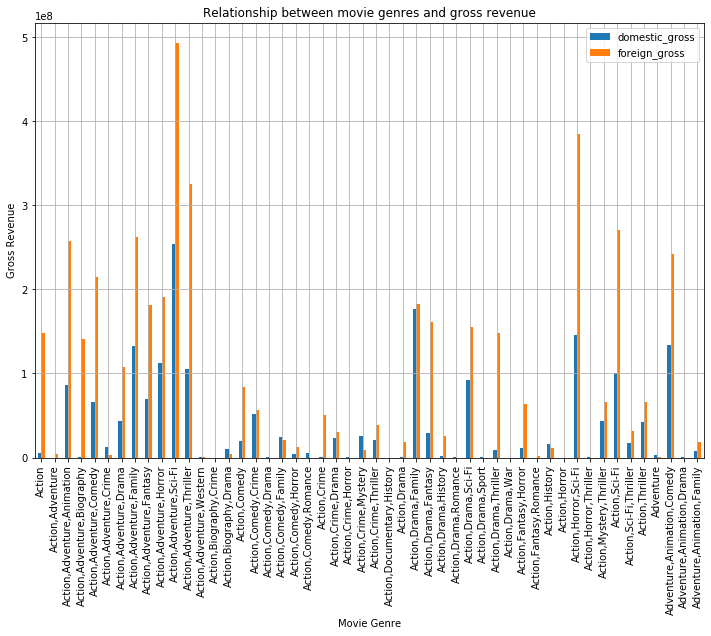

In [1090]:
# Plotting a histogram showing the Relationship between movie genres and gross revenue

bgenre = dg.groupby('genres')['domestic_gross','foreign_gross'].mean().head(50).plot.bar( figsize=(12,8), grid=True)
bgenre.set_ylabel('Gross Revenue')
bgenre.set_xlabel('Movie Genre')
bgenre.set_title('Relationship between movie genres and gross revenue')

Text(0.5, 1.0, 'Relationship between movie genres and global gross revenue')

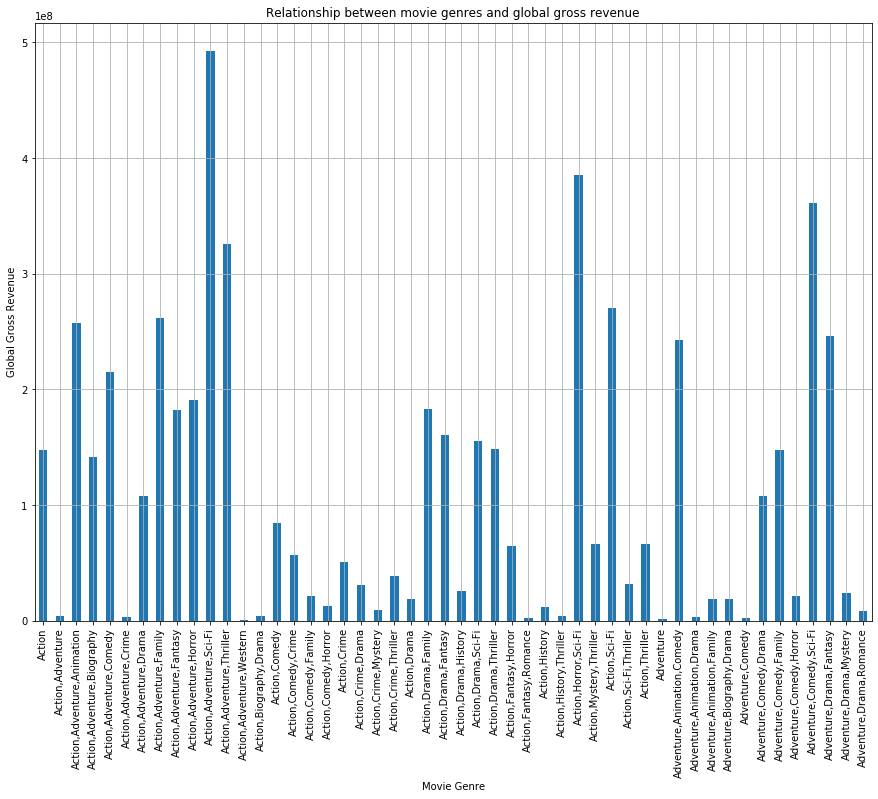

In [850]:
# Plotting a histogram showing the Relationship between movie genres and global gross revenue

fgenre = fg.groupby('genres')['foreign_gross'].mean().head(50).plot.bar( figsize=(15,11), grid=True)
fgenre.set_ylabel('Global Gross Revenue')
fgenre.set_xlabel('Movie Genre')
fgenre.set_title('Relationship between movie genres and global gross revenue')

## Question 2:
 
* Who are the top 5 writers, producers, and directors for top 3 genres? 

In [232]:
# splitting the cast to those worked in movies domestically and those who worked in movies globally using the data already sorted by the gross revenue
# then proceeded to drop missing values based on the proffesion column

cast_d = dg.dropna(subset=['primary_profession_y'])
cast_f = fg.dropna(subset=['primary_profession_y'])

In [979]:
# making variables for each important proffession, both domestically and globally

top_producers_domestic = cast_d[cast_d['primary_profession_y'].str.contains('producer')].head(20)
top_producers_global = cast_f[cast_f['primary_profession_y'].str.contains('producer')].head(20)

top_writers_domestic = cast_d[cast_d['primary_profession_y'].str.contains('writer')].head(20)
top_writers_global = cast_f[cast_f['primary_profession_y'].str.contains('writer')].head(20)

top_directors_domestic = cast_d[cast_d['primary_profession_y'].str.contains('director')].head(20)
top_directors_global = cast_f[cast_f['primary_profession_y'].str.contains('director')].head(20)

top_actor_domestic = cast_d[cast_d['primary_profession_y'].str.contains('actor')].head(20)
top_actor_global = cast_f[cast_f['primary_profession_y'].str.contains('actor')].head(50)

top_actress_domestic = cast_d[cast_d['primary_profession_y'].str.contains('actress')].head(20)
top_actress_global = cast_f[cast_f['primary_profession_y'].str.contains('actress')].head(50)

top_actress_domestic

,primary_title,genres,year,runtime_minutes,primary_name_y,primary_profession_y,averagerating,domestic_gross,foreign_gross
380,Rogue One: A Star Wars Story,"Action,Adventure,Sci-Fi",2016,133.0,Felicity Jones,"actress,producer,soundtrack",7.8,532200000.0,523900000
372,Captain America: Civil War,"Action,Adventure,Sci-Fi",2016,147.0,Scarlett Johansson,"actress,soundtrack,producer",7.8,408100000.0,745200000
282,The Hobbit: The Battle of the Five Armies,"Adventure,Fantasy",2014,144.0,Cate Blanchett,"actress,producer,director",7.4,255100000.0,700900000
539,Maleficent,"Action,Adventure,Family",2014,97.0,Elle Fanning,"actress,soundtrack,producer",7.0,241400000.0,517100000
507,Brave,"Adventure,Animation,Comedy",2012,93.0,Julie Walters,"actress,soundtrack",7.1,237300000.0,303200000
858,Straight Outta Compton,"Biography,Drama,History",2015,147.0,Andrea Berloff,"writer,actress,director",7.9,161200000.0,40400000
72,Daddy's Home,"Drama,Thriller",2015,90.0,Christina Trevino,"actress,writer,director",5.5,150400000.0,92400000
93,X-Men: First Class,"Action,Adventure,Sci-Fi",2011,131.0,Jennifer Lawrence,"actress,soundtrack,producer",7.7,146400000.0,207200000
639,Rio,"Adventure,Animation,Comedy",2011,96.0,Anne Hathaway,"actress,soundtrack,producer",6.9,143600000.0,341000000
641,Rio,Drama,2011,87.0,Olivia Crocicchia,actress,2.6,143600000.0,341000000


In [992]:
top_actor_global = top_actor_global.dropna()

In [997]:
top_actress_global = top_actress_global.dropna()

In [998]:
top_actress_global.isna().any()

primary_title           False
genres                  False
year                    False
runtime_minutes         False
primary_name_y          False
primary_profession_y    False
averagerating           False
domestic_gross          False
foreign_gross           False
dtype: bool

In [999]:
# finding the best team I need to make a hit action movie both domestically and globally

best_action_producers_domestic = top_producers_domestic[top_producers_domestic['genres'].str.contains('Action')]
best_action_producers_global =  top_producers_global[top_producers_global['genres'].str.contains('Action')]

best_action_writers_domestic = top_writers_domestic[top_writers_domestic['genres'].str.contains('Action')]
best_action_writers_global = top_writers_global[top_writers_global['genres'].str.contains('Action')]

best_action_director_domestic =  top_directors_domestic[top_directors_domestic['genres'].str.contains('Action')]
best_action_directors_global =  top_directors_global[top_directors_global['genres'].str.contains('Action')]

best_action_actors_domestic =  top_actor_domestic[top_actor_domestic['genres'].str.contains('Action')]
best_action_actors_global = top_actor_global[top_actor_global['genres'].str.contains('Action')]

best_action_actress_domestic =  top_actress_domestic[top_actress_domestic['genres'].str.contains('Action')]
best_action_actress_global = top_actress_global[top_actress_global['genres'].str.contains('Action')]

In [1089]:
best_action_directors_global.loc[:,['primary_name_y','primary_profession_y']].head(5)

,primary_name_y,primary_profession_y
69,Stanley Tucci,"actor,producer,director"
314,Don Murphy,"producer,actor,director"
350,Irrfan Khan,"actor,producer,director"
162,Akiva Goldsman,"producer,writer,director"
165,Steven Spielberg,"producer,writer,director"


In [1088]:
best_action_producers_global.loc[:,['primary_name_y','primary_profession_y']].head(5)

,primary_name_y,primary_profession_y
270,Chris Hemsworth,"actor,soundtrack,producer"
69,Stanley Tucci,"actor,producer,director"
36,John Logan,"writer,producer,executive"
314,Don Murphy,"producer,actor,director"
372,Scarlett Johansson,"actress,soundtrack,producer"


In [1087]:
best_action_writers_global.loc[:,['primary_name_y','primary_profession_y']].head(5)

,primary_name_y,primary_profession_y
36,John Logan,"writer,producer,executive"
163,Jeff Pinkner,"producer,writer,miscellaneous"
162,Akiva Goldsman,"producer,writer,director"
165,Steven Spielberg,"producer,writer,director"
818,T.J. Miller,"actor,writer,producer"


In [1001]:
# finding the best team I need to make a hit adventure movie both domestically and globally

best_adventure_producers_domestic = top_producers_domestic[top_producers_domestic['genres'].str.contains('Adventure')]
best_adventure_producers_global =  top_producers_global[top_producers_global['genres'].str.contains('Adventure')]

best_adventure_writers_domestic = top_writers_domestic[top_writers_domestic['genres'].str.contains('Adventure')]
best_adventure_writers_global = top_writers_global[top_writers_global['genres'].str.contains('Adventure')]

best_adventure_director_domestic =  top_directors_domestic[top_directors_domestic['genres'].str.contains('Adventure')]
best_adventure_directors_global =  top_directors_global[top_directors_global['genres'].str.contains('Adventure')]

best_adventure_actors_domestic =  top_actor_domestic[top_actor_domestic['genres'].str.contains('Adventure')]
best_adventure_actors_global = top_actor_global[top_actor_global['genres'].str.contains('Adventure')]

best_adventure_actress_domestic =  top_actress_domestic[top_actress_domestic['genres'].str.contains('Adventure')]
best_adventure_actress_global = top_actress_global[top_actress_global['genres'].str.contains('Adventure')]


In [1077]:
best_adventure_producers_global.loc[:,['primary_name_y','primary_profession_y']].head(5)

,primary_name_y,primary_profession_y
270,Chris Hemsworth,"actor,soundtrack,producer"
685,Jennifer Lee,"writer,miscellaneous,producer"
69,Stanley Tucci,"actor,producer,director"
41,Christopher Meledandri,"producer,miscellaneous,executive"
36,John Logan,"writer,producer,executive"


In [1085]:
best_adventure_writers_global.loc[:,['primary_name_y','primary_profession_y']].head(5)

,primary_name_y,primary_profession_y
685,Jennifer Lee,"writer,miscellaneous,producer"
36,John Logan,"writer,producer,executive"
530,Mike Mitchell,"actor,director,writer"
44,Cinco Paul,"writer,producer,actor"
163,Jeff Pinkner,"producer,writer,miscellaneous"


In [1086]:
best_adventure_directors_global.loc[:,['primary_name_y','primary_profession_y']].head(5)

,primary_name_y,primary_profession_y
69,Stanley Tucci,"actor,producer,director"
314,Don Murphy,"producer,actor,director"
282,Cate Blanchett,"actress,producer,director"
386,Carolynne Cunningham,"assistant_director,producer,production_manager"
567,Ben Stiller,"producer,actor,director"


In [1081]:
# finding the best team I need to make a hit Sci-fi movie both domestically and globally

best_scifi_producers_domestic = top_producers_domestic[top_producers_domestic['genres'].str.contains('Sci-Fi')]
best_scifi_producers_global =  top_producers_global[top_producers_global['genres'].str.contains('Sci-Fi')]

best_scifi_writers_domestic = top_writers_domestic[top_writers_domestic['genres'].str.contains('Sci-Fi')]
best_scifi_writers_global = top_writers_global[top_writers_global['genres'].str.contains('Sci-Fi')]

best_scifi_directors_domestic =  top_directors_domestic[top_directors_domestic['genres'].str.contains('Sci-Fi')]
best_scifi_directors_global =  top_directors_global[top_directors_global['genres'].str.contains('Sci-Fi')]

best_scifi_actors_domestic =  top_actor_domestic[top_actor_domestic['genres'].str.contains('Sci-Fi')]
best_scifi_actors_global = top_actor_global[top_actor_global['genres'].str.contains('Sci-Fi')]

best_scifi_actress_domestic =  top_actress_domestic[top_actress_domestic['genres'].str.contains('Sci-Fi')]
best_scifi_actress_global = top_actress_global[top_actress_global['genres'].str.contains('Sci-Fi')]

best_action_actors_global

,primary_title,genres,year,runtime_minutes,primary_name_y,primary_profession_y,averagerating,domestic_gross,foreign_gross
270,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",2015,141.0,Chris Hemsworth,"actor,soundtrack,producer",7.3,459000000.0,946400000.0
671,Jurassic World: Fallen Kingdom,"Action,Adventure,Sci-Fi",2018,128.0,Rafe Spall,actor,6.2,417700000.0,891800000.0
69,Transformers: Age of Extinction,"Action,Adventure,Sci-Fi",2014,165.0,Stanley Tucci,"actor,producer,director",5.7,245400000.0,858600000.0
314,Transformers: Dark of the Moon,"Action,Adventure,Sci-Fi",2011,154.0,Don Murphy,"producer,actor,director",6.2,352400000.0,771400000.0
276,Operation Red Sea,"Action,Drama,Thriller",2018,142.0,Johnny Huang,actor,6.7,1500000.0,577700000.0
350,The Amazing Spider-Man,"Action,Adventure,Sci-Fi",2012,136.0,Irrfan Khan,"actor,producer,director",7.0,262000000.0,495900000.0
325,Deadpool 2,"Action,Adventure,Comedy",2018,119.0,Ryan Reynolds,"actor,producer,soundtrack",7.8,318500000.0,460500000.0
818,Big Hero 6,"Action,Adventure,Animation",2014,102.0,T.J. Miller,"actor,writer,producer",7.8,222500000.0,435300000.0
45,Puss in Boots,"Action,Adventure,Animation",2011,90.0,Brian Lynch,"writer,actor,director",6.6,149300000.0,405700000.0
133,War for the Planet of the Apes,"Action,Adventure,Drama",2017,140.0,Woody Harrelson,"actor,producer,soundtrack",7.5,146900000.0,343800000.0


In [1082]:
best_scifi_writers_global.loc[:,['primary_name_y','primary_profession_y']].head(5)

,primary_name_y,primary_profession_y
163,Jeff Pinkner,"producer,writer,miscellaneous"
162,Akiva Goldsman,"producer,writer,director"
165,Steven Spielberg,"producer,writer,director"
664,Jon Hoeber,"writer,producer,miscellaneous"
342,Wai Lun Ng,"writer,assistant_director,miscellaneous"


In [1083]:
best_scifi_directors_global.loc[:,['primary_name_y','primary_profession_y']].head(5)

,primary_name_y,primary_profession_y
69,Stanley Tucci,"actor,producer,director"
314,Don Murphy,"producer,actor,director"
350,Irrfan Khan,"actor,producer,director"
162,Akiva Goldsman,"producer,writer,director"
165,Steven Spielberg,"producer,writer,director"


In [1084]:
best_scifi_producers_global.loc[:,['primary_name_y','primary_profession_y']].head(5)

,primary_name_y,primary_profession_y
270,Chris Hemsworth,"actor,soundtrack,producer"
69,Stanley Tucci,"actor,producer,director"
314,Don Murphy,"producer,actor,director"
372,Scarlett Johansson,"actress,soundtrack,producer"
380,Felicity Jones,"actress,producer,soundtrack"


## Question 3:

* What's the relationship between the length of a movie and the gross revenue/rating of that movie

[Text(232.61818181818177, 0.5, 'Rating'),
 Text(0.5, 15.0, 'Movie Length'),
 Text(0.5, 1, 'Movie length vs Movie Ratings Globally')]

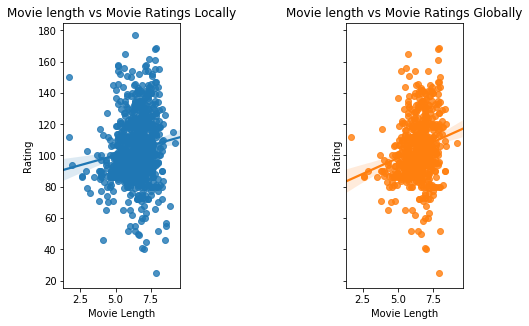

In [1225]:
# finding the Relationship between the length of a movie and the ratings of that movie, both domestically and globally

import seaborn as sns


fig, (dggraph, fggraph) = plt.subplots(ncols=2, sharey=True)
plt.tight_layout(pad=0.1, w_pad=15, h_pad=0.9)


sns.regplot(x='averagerating', y='runtime_minutes', data = dg ,fit_reg=True, ax=dggraph)
dggraph.set(ylabel='Rating', xlabel='Movie Length', title = 'Movie length vs Movie Ratings Locally')

sns.regplot(x='averagerating', y='runtime_minutes', data =fg, fit_reg=True, ax=fggraph)
fggraph.set(ylabel='Rating', xlabel='Movie Length', title = 'Movie length vs Movie Ratings Globally')



[Text(232.61818181818177, 0.5, 'Gross'),
 Text(0.5, 15.0, 'Movie Length'),
 Text(0.5, 1, 'Movie length vs Movie Revenue Globally')]

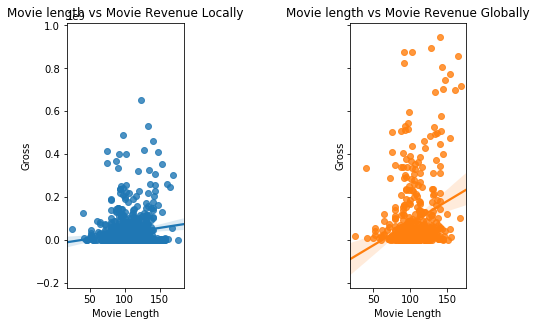

In [1230]:
# finding the Relationship between the length of a movie and the gross revenue of that movie, both domestically and globally

fig, (dggross_graph, fggross_graph) = plt.subplots(ncols=2, sharey=True)
plt.tight_layout(pad=0.1, w_pad=15, h_pad=0.9)


sns.regplot(x='runtime_minutes', y='domestic_gross',  data = dg, fit_reg=True, ax=dggross_graph)
dggross_graph.set(ylabel='Gross', xlabel='Movie Length', title = 'Movie length vs Movie Revenue Locally')

sns.regplot(y='foreign_gross',x='runtime_minutes', data =fg, fit_reg=True, ax=fggross_graph)
fggross_graph.set(ylabel='Gross', xlabel='Movie Length', title = 'Movie length vs Movie Revenue Globally')

## Question 4:


* What's the relationship between the movie release month and the gross revenue/rating of a movie? 

In [910]:
tnbudget.release_date_x.dtype

dtype('O')

In [893]:
tnbudget

,id,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,Unnamed: 0,genre_ids,original_language,original_title,popularity,release_date_y,title,vote_average,vote_count,Release_month,Release_day
0,27,"May 4, 2012",The Avengers,225000000,"623,279,547",1517935897,117,"[18, 10402, 10749]",en,9 Songs,10.332,2004-09-09,9 Songs,4.9,170,Sep,9
1,27,"May 21, 2010",Shrek Forever After,165000000,"238,736,787",756244673,117,"[18, 10402, 10749]",en,9 Songs,10.332,2004-09-09,9 Songs,4.9,170,Sep,9
2,27,"Dec 25, 2015",The Revenant,135000000,"183,637,894",532938302,117,"[18, 10402, 10749]",en,9 Songs,10.332,2004-09-09,9 Songs,4.9,170,Sep,9
3,27,"Dec 17, 2004",The Aviator,110000000,"102,608,827",208370892,117,"[18, 10402, 10749]",en,9 Songs,10.332,2004-09-09,9 Songs,4.9,170,Sep,9
4,27,"Dec 18, 2002",The Lord of the Rings: The Two Towers,94000000,"342,548,984",934699645,117,"[18, 10402, 10749]",en,9 Songs,10.332,2004-09-09,9 Songs,4.9,170,Sep,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,97,"May 15, 2015",Childless,1000000,"1,036",1036,2567,"[878, 28, 12]",en,Tron,12.063,1982-07-09,Tron,6.6,1100,Jul,9
340,97,"Apr 7, 1933",King Kong,672000,"10,000,000",10000650,2567,"[878, 28, 12]",en,Tron,12.063,1982-07-09,Tron,6.6,1100,Jul,9
341,97,"Aug 11, 2006",Conversations with Other Women,450000,"379,418",1297745,2567,"[878, 28, 12]",en,Tron,12.063,1982-07-09,Tron,6.6,1100,Jul,9
342,97,"Apr 11, 2014",Jesus People,250000,0,0,2567,"[878, 28, 12]",en,Tron,12.063,1982-07-09,Tron,6.6,1100,Jul,9


In [911]:
# Extracting the month into its own seperate column using the tmdb

tnbudget['Release_month'] = pd.DatetimeIndex(tnbudget['release_date_x']).month

In [912]:
# Extracting the days into its own seperate column using the tmdb

tnbudget['Release_day'] = pd.DatetimeIndex(tnbudget['release_date_x']).day

In [913]:
tnbudget['Release_day']

0       4
1      21
2      25
3      17
4      18
       ..
339    15
340     7
341    11
342    11
343    25
Name: Release_day, Length: 344, dtype: int64

In [914]:
import calendar
tnbudget['Release_month'] = tnbudget['Release_month'].apply(lambda x: calendar.month_abbr[x])

In [898]:
tnbudget

,id,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,Unnamed: 0,genre_ids,original_language,original_title,popularity,release_date_y,title,vote_average,vote_count,Release_month,Release_day
0,27,"May 4, 2012",The Avengers,225000000,"623,279,547",1517935897,117,"[18, 10402, 10749]",en,9 Songs,10.332,2004-09-09,9 Songs,4.9,170,Sep,9
1,27,"May 21, 2010",Shrek Forever After,165000000,"238,736,787",756244673,117,"[18, 10402, 10749]",en,9 Songs,10.332,2004-09-09,9 Songs,4.9,170,Sep,9
2,27,"Dec 25, 2015",The Revenant,135000000,"183,637,894",532938302,117,"[18, 10402, 10749]",en,9 Songs,10.332,2004-09-09,9 Songs,4.9,170,Sep,9
3,27,"Dec 17, 2004",The Aviator,110000000,"102,608,827",208370892,117,"[18, 10402, 10749]",en,9 Songs,10.332,2004-09-09,9 Songs,4.9,170,Sep,9
4,27,"Dec 18, 2002",The Lord of the Rings: The Two Towers,94000000,"342,548,984",934699645,117,"[18, 10402, 10749]",en,9 Songs,10.332,2004-09-09,9 Songs,4.9,170,Sep,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,97,"May 15, 2015",Childless,1000000,"1,036",1036,2567,"[878, 28, 12]",en,Tron,12.063,1982-07-09,Tron,6.6,1100,Jul,9
340,97,"Apr 7, 1933",King Kong,672000,"10,000,000",10000650,2567,"[878, 28, 12]",en,Tron,12.063,1982-07-09,Tron,6.6,1100,Jul,9
341,97,"Aug 11, 2006",Conversations with Other Women,450000,"379,418",1297745,2567,"[878, 28, 12]",en,Tron,12.063,1982-07-09,Tron,6.6,1100,Jul,9
342,97,"Apr 11, 2014",Jesus People,250000,0,0,2567,"[878, 28, 12]",en,Tron,12.063,1982-07-09,Tron,6.6,1100,Jul,9


In [915]:
# cleaning the columns I need by replacing the $ and , in the domestic_gross, worldwide_gross $ production_budget columns

tnbudget['domestic_gross'] = tnbudget.domestic_gross.str.replace('$', '')
tnbudget['worldwide_gross'] = tnbudget.worldwide_gross.str.replace('$', '')
tnbudget['worldwide_gross'] = tnbudget.worldwide_gross.str.replace(',', '')
tnbudget['production_budget'] = tnbudget.production_budget.str.replace('$', '')
tnbudget['production_budget'] = tnbudget.production_budget.str.replace(',', '')

In [900]:
tnbudget

,id,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,Unnamed: 0,genre_ids,original_language,original_title,popularity,release_date_y,title,vote_average,vote_count,Release_month,Release_day
0,27,"May 4, 2012",The Avengers,225000000,"623,279,547",1517935897,117,"[18, 10402, 10749]",en,9 Songs,10.332,2004-09-09,9 Songs,4.9,170,Sep,9
1,27,"May 21, 2010",Shrek Forever After,165000000,"238,736,787",756244673,117,"[18, 10402, 10749]",en,9 Songs,10.332,2004-09-09,9 Songs,4.9,170,Sep,9
2,27,"Dec 25, 2015",The Revenant,135000000,"183,637,894",532938302,117,"[18, 10402, 10749]",en,9 Songs,10.332,2004-09-09,9 Songs,4.9,170,Sep,9
3,27,"Dec 17, 2004",The Aviator,110000000,"102,608,827",208370892,117,"[18, 10402, 10749]",en,9 Songs,10.332,2004-09-09,9 Songs,4.9,170,Sep,9
4,27,"Dec 18, 2002",The Lord of the Rings: The Two Towers,94000000,"342,548,984",934699645,117,"[18, 10402, 10749]",en,9 Songs,10.332,2004-09-09,9 Songs,4.9,170,Sep,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,97,"May 15, 2015",Childless,1000000,"1,036",1036,2567,"[878, 28, 12]",en,Tron,12.063,1982-07-09,Tron,6.6,1100,Jul,9
340,97,"Apr 7, 1933",King Kong,672000,"10,000,000",10000650,2567,"[878, 28, 12]",en,Tron,12.063,1982-07-09,Tron,6.6,1100,Jul,9
341,97,"Aug 11, 2006",Conversations with Other Women,450000,"379,418",1297745,2567,"[878, 28, 12]",en,Tron,12.063,1982-07-09,Tron,6.6,1100,Jul,9
342,97,"Apr 11, 2014",Jesus People,250000,0,0,2567,"[878, 28, 12]",en,Tron,12.063,1982-07-09,Tron,6.6,1100,Jul,9


In [926]:
# changing the needed columns into a float data type

tnbudget['production_budget'] = tnbudget['production_budget'].astype(int)
tnbudget['worldwide_gross'] = tnbudget['worldwide_gross'].astype(int)

In [956]:
tnbudget

,id,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,Unnamed: 0,genre_ids,original_language,original_title,popularity,release_date_y,title,vote_average,vote_count,Release_month,Release_day
0,27,"May 4, 2012",The Avengers,225000000,"623,279,547",1517935897,117,"[18, 10402, 10749]",en,9 Songs,10.332,2004-09-09,9 Songs,4.9,170,May,4
1,27,"May 21, 2010",Shrek Forever After,165000000,"238,736,787",756244673,117,"[18, 10402, 10749]",en,9 Songs,10.332,2004-09-09,9 Songs,4.9,170,May,21
2,27,"Dec 25, 2015",The Revenant,135000000,"183,637,894",532938302,117,"[18, 10402, 10749]",en,9 Songs,10.332,2004-09-09,9 Songs,4.9,170,Dec,25
3,27,"Dec 17, 2004",The Aviator,110000000,"102,608,827",208370892,117,"[18, 10402, 10749]",en,9 Songs,10.332,2004-09-09,9 Songs,4.9,170,Dec,17
4,27,"Dec 18, 2002",The Lord of the Rings: The Two Towers,94000000,"342,548,984",934699645,117,"[18, 10402, 10749]",en,9 Songs,10.332,2004-09-09,9 Songs,4.9,170,Dec,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,97,"May 15, 2015",Childless,1000000,"1,036",1036,2567,"[878, 28, 12]",en,Tron,12.063,1982-07-09,Tron,6.6,1100,May,15
340,97,"Apr 7, 1933",King Kong,672000,"10,000,000",10000650,2567,"[878, 28, 12]",en,Tron,12.063,1982-07-09,Tron,6.6,1100,Apr,7
341,97,"Aug 11, 2006",Conversations with Other Women,450000,"379,418",1297745,2567,"[878, 28, 12]",en,Tron,12.063,1982-07-09,Tron,6.6,1100,Aug,11
342,97,"Apr 11, 2014",Jesus People,250000,0,0,2567,"[878, 28, 12]",en,Tron,12.063,1982-07-09,Tron,6.6,1100,Apr,11


In [970]:
month_gross = tnbudget.groupby(tnbudget['Release_month']).mean()

In [971]:
monthly_gross = round(month_gross)

In [972]:
monthly_gross 

,id,production_budget,worldwide_gross,Unnamed: 0,popularity,vote_average,vote_count,Release_day
Release_month,,,,,,,,
Apr,77.0,40736880.0,141533026.0,5345.0,14.0,7.0,1890.0,12.0
Aug,85.0,19664795.0,51015205.0,6783.0,15.0,7.0,2403.0,15.0
Dec,72.0,39328111.0,129176443.0,8822.0,16.0,7.0,2657.0,22.0
Feb,87.0,18350000.0,88131678.0,3478.0,13.0,7.0,1361.0,12.0
Jan,80.0,19625000.0,52340450.0,6100.0,15.0,7.0,2402.0,16.0
Jul,70.0,40137344.0,119915952.0,7348.0,16.0,7.0,2530.0,17.0
Jun,73.0,44357258.0,139433778.0,6294.0,15.0,7.0,2029.0,16.0
Mar,83.0,19041935.0,44726163.0,4338.0,14.0,7.0,2124.0,16.0
May,68.0,41444792.0,191288980.0,7960.0,15.0,7.0,1854.0,15.0


Text(0.5, 1.0, 'Relationship between the release month and the gross revenue of a movie')

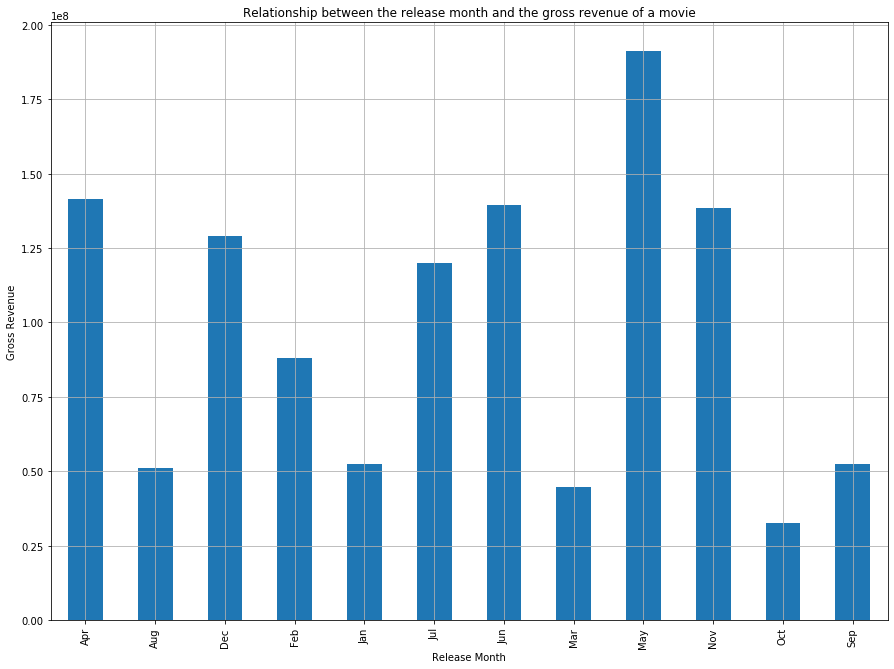

In [1044]:
ax = monthly_gross['worldwide_gross'].plot.bar( figsize=(15,11), grid=True)
ax.set_ylabel('Gross Revenue')
ax.set_xlabel('Release Month')
ax.set_title('Relationship between the release month and the gross revenue of a movie')

## Question 5:

* What's the relationship between the age of a crew member and the rating of a movie? 

In [945]:
# finding the sum of the missing values

sum(imdbandgross.birth_year_y.isna())

408

In [946]:
# dropping empty values for the column needed

crew_age = imdbandgross.dropna(subset = ['birth_year_y'])

In [947]:
crew_age

,tconst,directors,writers,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,...,primary_name_y,birth_year_y,death_year_y,primary_profession_y,known_for_titles_y,title_y,studio,domestic_gross,foreign_gross,year
0,tt1931533,nm1732981,nm1732981,7.2,223493,Seven Psychopaths,Seven Psychopaths,2012,110.0,"Comedy,Crime",...,Christopher Walken,1943.0,NaN,"actor,soundtrack,miscellaneous","tt0077416,tt0264464,tt1931533,tt0427327",Seven Psychopaths,CBS,15000000.0,4400000,2012
1,tt0835418,nm0151540,"nm0310087,nm0841532",5.0,8147,The Babymakers,The Babymakers,2012,95.0,Comedy,...,Edward Shearmur,1966.0,NaN,"composer,music_department,soundtrack","tt0305357,tt0212346,tt0160127,tt0346156",The Babymakers,MNE,7900.0,NaN,2012
2,tt1067583,nm1349376,"nm0481418,nm2717485",6.9,105812,Water for Elephants,Water for Elephants,2011,120.0,"Drama,Romance",...,Paul Schneider,1976.0,NaN,"actor,writer,soundtrack","tt0299458,tt1067583,tt0368709,tt0805564",Water for Elephants,Fox,58700000.0,58400000,2011
3,tt1711525,"nm0330347,nm0817447","nm0524190,nm0601859,nm0000251,nm3675159,nm2083...",5.8,59253,Office Christmas Party,Office Christmas Party,2016,105.0,Comedy,...,Olivia Munn,1980.0,NaN,"actress,writer","tt0115147,tt1711525,tt1870479,tt3385516",Office Christmas Party,Par.,54800000.0,59700000,2016
4,tt1411704,nm0384722,"nm0666791,nm0202425,nm0528244",5.4,28893,Hop,Hop,2011,95.0,"Adventure,Animation,Comedy",...,James Marsden,1973.0,NaN,"actor,soundtrack","tt0461770,tt0120903,tt0988595,tt0427327",Hop,Uni.,108100000.0,75900000,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,tt1692226,nm1102236,nm1102236,7.0,7,The Way,The Way,2010,107.0,Drama,...,Mika Krstic,1978.0,NaN,"music_department,composer,producer","tt1679313,tt2090454,tt1822394,tt1455807",The Way,PDA,4400000.0,NaN,2011
950,tt2809082,nm1646040,NaN,8.3,18,Bastards,Bastards,2014,80.0,"Biography,Documentary,Family",...,Debbie Wiseman,1963.0,NaN,"composer,music_department,soundtrack","tt1020885,tt0119873,tt0373690,tt0790665",Bastards,IFC,24500.0,NaN,2013
963,tt3304610,nm5625014,"nm6058566,nm5625014",5.1,16,Extraction,Extraction,2015,NaN,"Action,Crime,Thriller",...,Medalion Rahimi,1992.0,NaN,actress,"tt5165412,tt2370138,tt4855748,tt1691916",Extraction,LGP,16800.0,NaN,2015
964,tt3268030,nm6022940,"nm6022938,nm6022940",7.3,905,Advanced Style,Advanced Style,2014,72.0,"Biography,Comedy,Documentary",...,Iris Apfel,1921.0,NaN,actress,"tt8784472,tt6802360,tt1621444,tt4157220",Advanced Style,B360,87900.0,NaN,2014


In [948]:
# dropping empty values for the column needed

crew_age = crew_age.dropna(subset = ['primary_profession_y'] )

In [735]:
crew_age

,tconst,directors,writers,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,...,primary_name_y,birth_year_y,death_year_y,primary_profession_y,known_for_titles_y,title_y,studio,domestic_gross,foreign_gross,year
0,tt1931533,nm1732981,nm1732981,7.2,223493,Seven Psychopaths,Seven Psychopaths,2012,110.0,"Comedy,Crime",...,Christopher Walken,1943.0,NaN,"actor,soundtrack,miscellaneous","tt0077416,tt0264464,tt1931533,tt0427327",Seven Psychopaths,CBS,15000000.0,4400000.0,2012
1,tt0835418,nm0151540,"nm0310087,nm0841532",5.0,8147,The Babymakers,The Babymakers,2012,95.0,Comedy,...,Edward Shearmur,1966.0,NaN,"composer,music_department,soundtrack","tt0305357,tt0212346,tt0160127,tt0346156",The Babymakers,MNE,7900.0,NaN,2012
2,tt1067583,nm1349376,"nm0481418,nm2717485",6.9,105812,Water for Elephants,Water for Elephants,2011,120.0,"Drama,Romance",...,Paul Schneider,1976.0,NaN,"actor,writer,soundtrack","tt0299458,tt1067583,tt0368709,tt0805564",Water for Elephants,Fox,58700000.0,58400000.0,2011
3,tt1711525,"nm0330347,nm0817447","nm0524190,nm0601859,nm0000251,nm3675159,nm2083...",5.8,59253,Office Christmas Party,Office Christmas Party,2016,105.0,Comedy,...,Olivia Munn,1980.0,NaN,"actress,writer","tt0115147,tt1711525,tt1870479,tt3385516",Office Christmas Party,Par.,54800000.0,59700000.0,2016
4,tt1411704,nm0384722,"nm0666791,nm0202425,nm0528244",5.4,28893,Hop,Hop,2011,95.0,"Adventure,Animation,Comedy",...,James Marsden,1973.0,NaN,"actor,soundtrack","tt0461770,tt0120903,tt0988595,tt0427327",Hop,Uni.,108100000.0,75900000.0,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,tt1692226,nm1102236,nm1102236,7.0,7,The Way,The Way,2010,107.0,Drama,...,Mika Krstic,1978.0,NaN,"music_department,composer,producer","tt1679313,tt2090454,tt1822394,tt1455807",The Way,PDA,4400000.0,NaN,2011
950,tt2809082,nm1646040,NaN,8.3,18,Bastards,Bastards,2014,80.0,"Biography,Documentary,Family",...,Debbie Wiseman,1963.0,NaN,"composer,music_department,soundtrack","tt1020885,tt0119873,tt0373690,tt0790665",Bastards,IFC,24500.0,NaN,2013
963,tt3304610,nm5625014,"nm6058566,nm5625014",5.1,16,Extraction,Extraction,2015,NaN,"Action,Crime,Thriller",...,Medalion Rahimi,1992.0,NaN,actress,"tt5165412,tt2370138,tt4855748,tt1691916",Extraction,LGP,16800.0,NaN,2015
964,tt3268030,nm6022940,"nm6022938,nm6022940",7.3,905,Advanced Style,Advanced Style,2014,72.0,"Biography,Comedy,Documentary",...,Iris Apfel,1921.0,NaN,actress,"tt8784472,tt6802360,tt1621444,tt4157220",Advanced Style,B360,87900.0,NaN,2014


In [949]:
# dropping rnadom characters like ,

crew_age['foreign_gross'] = crew_age.foreign_gross.replace(',','', regex=True).astype(float)

C:\Users\jrizz_000\anaconda3\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [950]:
# extracting the crew members of the movies and making a variable for their inidividual profession

writers_age = crew_age[crew_age['primary_profession_y'].str.contains('writer')]
producers_age = crew_age[crew_age['primary_profession_y'].str.contains('producer')]
directors_age = crew_age[crew_age['primary_profession_y'].str.contains('director')]
actors_age = crew_age[crew_age['primary_profession_y'].str.contains('actor')]
actress_age = crew_age[crew_age['primary_profession_y'].str.contains('actress')]

[Text(0, 0.5, 'Birth Year'),
 Text(0.5, 0, 'Movie Review'),
 Text(0.5, 1.0, 'Writers Birth Year vs Movie Rating')]

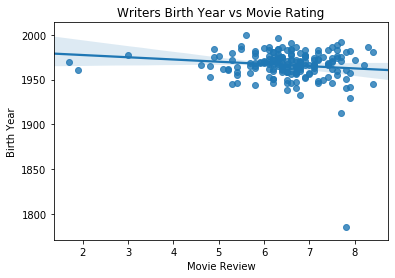

In [1219]:
#Plot a graph showing the relationship between the birth year of the writers vs the movie ratings

wr = sns.regplot(x='averagerating', y='birth_year_y', data = writers_age ,fit_reg=True)
wr.set(ylabel='Birth Year', xlabel='Movie Review', title = 'Writers Birth Year vs Movie Rating')

[Text(232.61818181818177, 0.5, 'Birth Year'),
 Text(0.5, 15.0, 'Movie Review'),
 Text(0.5, 1, 'Diretors Birth Year vs Movie Rating')]

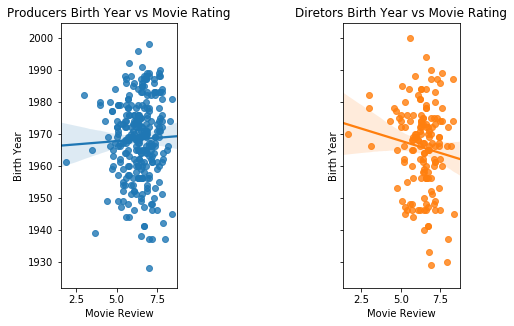

In [1218]:
#Plot a graph showing the relationship between the birth year of the producer and directors vs the movie ratings

fig, (pr, dr) = plt.subplots(ncols=2, sharey=True)
plt.tight_layout(pad=0.1, w_pad=15, h_pad=0.9)


sns.regplot(x='averagerating', y='birth_year_y', data = producers_age ,fit_reg=True, ax=pr)
pr.set(ylabel='Birth Year', xlabel='Movie Review', title = 'Producers Birth Year vs Movie Rating')

sns.regplot(x='averagerating', y='birth_year_y', data = directors_age ,fit_reg=True, ax=dr)
dr.set(ylabel='Birth Year', xlabel='Movie Review', title = 'Diretors Birth Year vs Movie Rating')

[Text(232.61818181818177, 0.5, 'Birth Year'),
 Text(0.5, 15.0, 'Movie Review'),
 Text(0.5, 1, 'Actress Birth Year vs Movie Rating')]

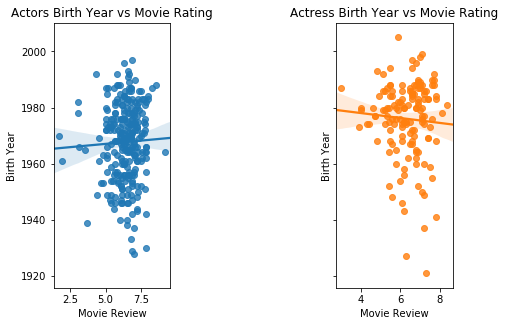

In [1209]:
#Plot a graph showing the relationship between the birth year of an actor/actress vs the movie ratings

fig, (ar, arr) = plt.subplots(ncols=2, sharey=True)
plt.tight_layout(pad=0.1, w_pad=15, h_pad=0.9)


sns.regplot(x='averagerating', y='birth_year_y', data = actors_age ,fit_reg=True, ax=ar)
ar.set(ylabel='Birth Year', xlabel='Movie Review', title = 'Actors Birth Year vs Movie Rating')

#Plot a graph showing the relationship between the birth year of the actress and the average rating of the movie

sns.regplot(x='averagerating', y='birth_year_y', data = actress_age ,fit_reg=True, ax=arr)
arr.set(ylabel='Birth Year', xlabel='Movie Review', title = 'Actress Birth Year vs Movie Rating')


## Question 6:

* What's the relationship between the gender of the lead act in an action movie and the gross revenue?

In [1005]:
best_action_actors_global.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 270 to 290
Data columns (total 9 columns):
primary_title           22 non-null object
genres                  22 non-null object
year                    22 non-null int64
runtime_minutes         22 non-null float64
primary_name_y          22 non-null object
primary_profession_y    22 non-null object
averagerating           22 non-null float64
domestic_gross          22 non-null float64
foreign_gross           22 non-null float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.7+ KB


In [1058]:
best_action_actress_global

,primary_title,genres,year,runtime_minutes,primary_name_y,primary_profession_y,averagerating,domestic_gross,foreign_gross
372,Captain America: Civil War,"Action,Adventure,Sci-Fi",2016,147.0,Scarlett Johansson,"actress,soundtrack,producer",7.8,408100000.0,745200000.0
380,Rogue One: A Star Wars Story,"Action,Adventure,Sci-Fi",2016,133.0,Felicity Jones,"actress,producer,soundtrack",7.8,532200000.0,523900000.0
539,Maleficent,"Action,Adventure,Family",2014,97.0,Elle Fanning,"actress,soundtrack,producer",7.0,241400000.0,517100000.0
326,Prince of Persia: The Sands of Time,"Action,Adventure,Fantasy",2010,116.0,Gemma Arterton,"actress,soundtrack,producer",6.6,90800000.0,245600000.0
93,X-Men: First Class,"Action,Adventure,Sci-Fi",2011,131.0,Jennifer Lawrence,"actress,soundtrack,producer",7.7,146400000.0,207200000.0
269,After Earth,"Action,Adventure,Drama",2013,100.0,Sophie Okonedo,actress,4.8,60500000.0,183300000.0
674,The Bourne Legacy,"Action,Adventure,Thriller",2012,135.0,Rachel Weisz,"actress,producer,soundtrack",6.7,113200000.0,162900000.0
525,The Sorcerer's Apprentice,"Action,Adventure,Family",2010,109.0,Teresa Palmer,"actress,producer,writer",6.1,63200000.0,152100000.0
195,Baby Driver,"Action,Crime,Drama",2017,113.0,Eiza González,"actress,soundtrack,music_department",7.6,107800000.0,119100000.0
642,Mechanic: Resurrection,"Action,Adventure,Thriller",2016,98.0,Jessica Alba,"actress,cinematographer,producer",5.7,21200000.0,104500000.0


In [1016]:
# Merging the two databases using an outer join in order to group

gen = pd.merge(best_action_actors_global, best_action_actress_global, how='outer')

In [1017]:
gen.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 0 to 36
Data columns (total 9 columns):
primary_title           37 non-null object
genres                  37 non-null object
year                    37 non-null int64
runtime_minutes         37 non-null float64
primary_name_y          37 non-null object
primary_profession_y    37 non-null object
averagerating           37 non-null float64
domestic_gross          37 non-null float64
foreign_gross           37 non-null float64
dtypes: float64(4), int64(1), object(4)
memory usage: 2.9+ KB


In [1029]:
# Using a lambda function to create a new column that say if the cast member is an actor or actress

gen['Actor/Actress'] = gen['primary_profession_y'].map(lambda x: 'Female' if 'actress' in x else 'Male')

In [1059]:
gen

,primary_title,genres,year,runtime_minutes,primary_name_y,primary_profession_y,averagerating,domestic_gross,foreign_gross,Actor/Actress
0,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",2015,141.0,Chris Hemsworth,"actor,soundtrack,producer",7.3,459000000.0,946400000.0,Male
1,Jurassic World: Fallen Kingdom,"Action,Adventure,Sci-Fi",2018,128.0,Rafe Spall,actor,6.2,417700000.0,891800000.0,Male
2,Transformers: Age of Extinction,"Action,Adventure,Sci-Fi",2014,165.0,Stanley Tucci,"actor,producer,director",5.7,245400000.0,858600000.0,Male
3,Transformers: Dark of the Moon,"Action,Adventure,Sci-Fi",2011,154.0,Don Murphy,"producer,actor,director",6.2,352400000.0,771400000.0,Male
4,Operation Red Sea,"Action,Drama,Thriller",2018,142.0,Johnny Huang,actor,6.7,1500000.0,577700000.0,Male
5,The Amazing Spider-Man,"Action,Adventure,Sci-Fi",2012,136.0,Irrfan Khan,"actor,producer,director",7.0,262000000.0,495900000.0,Male
6,Deadpool 2,"Action,Adventure,Comedy",2018,119.0,Ryan Reynolds,"actor,producer,soundtrack",7.8,318500000.0,460500000.0,Male
7,Big Hero 6,"Action,Adventure,Animation",2014,102.0,T.J. Miller,"actor,writer,producer",7.8,222500000.0,435300000.0,Male
8,Puss in Boots,"Action,Adventure,Animation",2011,90.0,Brian Lynch,"writer,actor,director",6.6,149300000.0,405700000.0,Male
9,War for the Planet of the Apes,"Action,Adventure,Drama",2017,140.0,Woody Harrelson,"actor,producer,soundtrack",7.5,146900000.0,343800000.0,Male


In [1030]:
# Grouping the casts by their gender

gend = gen.groupby(gen['Actor/Actress']).mean()

In [1031]:
gend

,year,runtime_minutes,averagerating,domestic_gross,foreign_gross
Actor/Actress,,,,,
Female,2014.000000,114.333333,6.573333,1.228733e+08,2.174400e+08
Male,2013.636364,124.590909,6.695455,1.796909e+08,4.147955e+08


Text(0.5, 1.0, 'Relationship between the gender of the lead act and the gross revenue')

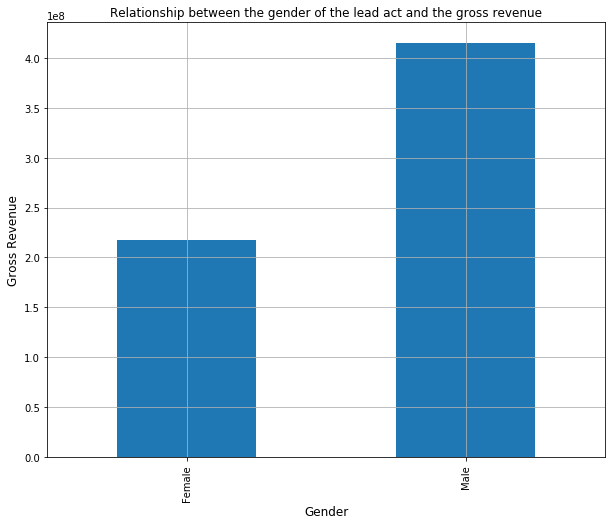

In [1048]:
# Plotting a histogram showing the Relationship between movie genres and gross revenue

gender = gend['foreign_gross'].plot.bar(figsize=(10,8), grid=True)
gender.set_ylabel('Gross Revenue', fontsize=12)
gender.set_xlabel('Gender', fontsize=12)
gender.set_title('Relationship between the gender of the lead act and the gross revenue',fontsize=12)